In [1]:
import pyodbc
print(pyodbc.drivers())

['SQL Server', 'ODBC Driver 17 for SQL Server', 'SQL Server Native Client RDA 11.0']


In [ ]:
server = "RASULBEK\SQLEXPRESS"  # SQL Server nomi (SSMS‚Äôning yuqorisida ko‚Äòrsatilgan)
database = "MyDatabase"      # Siz ishlatmoqchi bo‚Äòlgan bazaning nomi
username = "sa"              # Login (yoki Windows Authentication bo‚Äòlsa, bu kerak emas)
password = "your_password"   # Parol
driver = "ODBC Driver 17 for SQL Server"


# CSV ni DB ga aylantirish 

In [4]:
import pandas as pd
import pyodbc
import time

# 1Ô∏è‚É£ CSV faylni o‚Äòqish
df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Preprosessed\Clustering.csv")

# 2Ô∏è‚É£ SQL Server'ga ulanamiz (master bazaga)
conn_master = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=RASULBEK\\SQLEXPRESS;'
    'DATABASE=master;'
    'Trusted_Connection=yes;',
    autocommit=True  # MUHIM: autocommit yoqildi
)
cursor_master = conn_master.cursor()

# 3Ô∏è‚É£ Baza yaratish (faqat yo‚Äòq bo‚Äòlsa)
try:
    cursor_master.execute("IF DB_ID('ProjectDB') IS NULL CREATE DATABASE ProjectDB;")
    print("‚úÖ 'ProjectDB' bazasi yaratildi yoki allaqachon mavjud.")
except Exception as e:
    print("‚ö†Ô∏è Baza yaratishda xato:", e)

cursor_master.close()
conn_master.close()

# üîÑ Yangi bazani yaratgandan so‚Äòng kutish
time.sleep(2)

# 4Ô∏è‚É£ Endi shu bazaga ulanamiz
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=RASULBEK\\SQLEXPRESS;'
    'DATABASE=ProjectDB;'
    'Trusted_Connection=yes;',
    autocommit=True
)
cursor = conn.cursor()

# 5Ô∏è‚É£ Jadval nomi
table_name = "ClusteringData"

# 6Ô∏è‚É£ Jadval yaratish
columns = ", ".join([f"[{col}] NVARCHAR(MAX)" for col in df.columns])
create_query = f"IF OBJECT_ID('{table_name}', 'U') IS NULL CREATE TABLE {table_name} ({columns});"
cursor.execute(create_query)
print("üìã Jadval tayyor.")

# 7Ô∏è‚É£ Ma'lumotlarni joylash
for _, row in df.iterrows():
    values = "', '".join([str(v).replace("'", "''") for v in row.values])
    insert_query = f"INSERT INTO {table_name} VALUES ('{values}');"
    cursor.execute(insert_query)

print("üöÄ Barcha ma'lumotlar yuklandi!")

conn.close()


‚úÖ 'ProjectDB' bazasi yaratildi yoki allaqachon mavjud.
üìã Jadval tayyor.
üöÄ Barcha ma'lumotlar yuklandi!


# DB ga ulanish 

In [5]:
import pandas as pd
import pyodbc

conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=RASULBEK\\SQLEXPRESS;'
    'DATABASE=ProjectDB;'
    'Trusted_Connection=yes;'
)

df_sql = pd.read_sql("SELECT TOP 10 * FROM ClusteringData", conn)
print(df_sql.head())

conn.close()


      Video ID                                        Video Title  \
0  -7yvyIvJXH0                        O REL√ìGIO SECRETO DO GTA 5!   
1  9h5Uv27uTwU      GIRLS TRIP ??? Traumurlaub, Yoga & Surfen! ??   
2  SmF8VTWdqZU  Imran Riaz News About TLP Saad & Anas Rizvi #r...   
3  rvn2CD4h_ac     ???????????????????????????? Viral ??? #kornzo   
4  Efr59jKIkgU  ???????????? ?????????-??? Valorant [ ????????...   

            Channel        Published Date    Views  Likes Comments  \
0        GamerCosta  2025-10-20T00:05:43Z    34727    686       16   
1   Paula Doeringer  2025-10-16T16:03:51Z    45151   1514       21   
2  Real Muslim 100   2025-10-17T03:00:36Z   353713   6485      127   
3            Kornzo  2025-10-18T09:07:36Z  2171652  78431      183   
4               DOM  2025-10-16T10:48:06Z   246429   9321      949   

  Subscribers Channel Views Country  ... CategoryID_enc Country_enc  \
0     4190000    1909505035      BR  ...              4          12   
1      188000     135

C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_15556\92075091.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql = pd.read_sql("SELECT TOP 10 * FROM ClusteringData", conn)


# Davlatlar bo`yicha korishlar soni 

In [9]:
import pandas as pd
from sqlalchemy import create_engine

# SQL ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# So‚Äòrov
query = """
SELECT TOP 25 [Country], SUM(TRY_CAST([Views] AS BIGINT)) AS TotalViews
FROM ClusteringData
GROUP BY [Country]
ORDER BY TotalViews DESC
"""

# Natijani o‚Äòqish
df_country_views = pd.read_sql(query, engine)
print(df_country_views)


     Country  TotalViews
0   Noma‚Äôlum  7193851946
1         IN  5281954236
2         US  5255581553
3         ID  1030075560
4         BR   998029481
5         JP   815934502
6         KR   805866097
7         TR   675777992
8         VN   560446589
9         GB   487445529
10        ES   481267037
11        DE   481088127
12        MX   389017077
13        HK   387890135
14        TH   365733961
15        BD   332017157
16        MA   286024207
17        EG   225521106
18        FR   215277005
19        RU   209298311
20        CA   206136118
21        PK   189189702
22        AU   179378481
23        PH   176886263
24        PL   161317971


# üî• Eng Ko‚Äòp Like Olgan 25 ta Video

In [10]:
import pandas as pd
from sqlalchemy import create_engine

# üîó SQL ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üß† So‚Äòrov: eng ko‚Äòp layk olgan 25 ta video
query = """
SELECT TOP 25 
    [Video Title], 
    [Channel], 
    TRY_CAST([Likes] AS BIGINT) AS Likes, 
    TRY_CAST([Views] AS BIGINT) AS Views, 
    [Country],
    [CategoryName]
FROM ClusteringData
ORDER BY TRY_CAST([Likes] AS BIGINT) DESC
"""

# üìä Natijani olish
df_top_likes = pd.read_sql(query, engine)

print("üé¨ Eng ko‚Äòp like olgan 25 ta video:")
print(df_top_likes.head())

# üîπ Xohlovga ko‚Äòra grafikka aylantirish
import plotly.express as px

fig = px.bar(
    df_top_likes,
    x="Video Title",
    y="Likes",
    color="Channel",
    title="üî• Eng Ko‚Äòp Like Olgan 25 ta Video",
    text="Likes"
)
fig.update_layout(xaxis_tickangle=-45, height=600)
fig.show()


üé¨ Eng ko‚Äòp like olgan 25 ta video:
                                         Video Title            Channel  \
0  how to resolve cars like this #driving #truckd...       Driver Lover   
1                               The cat just said ??     Axisoflaughing   
2             The technological life of clowns#joker     Untitled Joker   
3           JISOO X ZAYN - EYES CLOSED (OFFICIAL MV)              JISOO   
4                                 The wisdom of Rumi  DemonHunters-Rumi   

     Likes     Views Country      CategoryName  
0  2791501  78045038      US  Autos & Vehicles  
1  2457094  73156104      DE     Entertainment  
2  2233477  52583013      ID  Film & Animation  
3  2189117  41212334      KR             Music  
4  2113659  98391199      HK     Howto & Style  


# üëÅÔ∏è Eng Ko‚Äòp Ko‚Äòrilgan 25 ta Video

In [11]:
import pandas as pd
from sqlalchemy import create_engine
import plotly.express as px

# üîó SQL ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üß† So‚Äòrov: eng ko‚Äòp ko‚Äòrilgan 25 ta video
query = """
SELECT TOP 25 
    [Video Title], 
    [Channel], 
    TRY_CAST([Views] AS BIGINT) AS Views,
    TRY_CAST([Likes] AS BIGINT) AS Likes,
    [Country],
    [CategoryName]
FROM ClusteringData
ORDER BY TRY_CAST([Views] AS BIGINT) DESC
"""

# üìä Natijani o‚Äòqish
df_top_views = pd.read_sql(query, engine)

print("üëÅÔ∏è Eng ko‚Äòp ko‚Äòrilgan 25 ta video:")
print(df_top_views.head())

# üé® Grafik: Top 25 Videos by Views
fig = px.bar(
    df_top_views,
    x="Video Title",
    y="Views",
    color="Channel",
    title="üëÅÔ∏è Eng Ko‚Äòp Ko‚Äòrilgan 25 ta Video",
    text="Views"
)

# üîß Grafik dizaynini yaxshilaymiz
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title="Video Sarlavhasi",
    yaxis_title="Ko‚Äòrishlar soni",
    height=600
)
fig.show()


üëÅÔ∏è Eng ko‚Äòp ko‚Äòrilgan 25 ta video:
                                         Video Title        Channel  \
0  Gainesville, FL doorbell camera captured the m...  Pouya Hashemi   
1                    Find My Football, Win ¬£1,000 ??    John Nellis   
2                                hero dog seved baby       itsanzar   
3                      PIMGO VIROU MINHOCA E ENTROU!          Pimgo   
4          ?National Food?How to love Natto????@Tade   ISSEI / ????   

       Views    Likes   Country      CategoryName  
0  161655701   893589  Noma‚Äôlum     Howto & Style  
1  138739251  2108133        GB            Sports  
2  137295275  1101985        MA     Entertainment  
3  135167139   619292        BR  Film & Animation  
4  134137949  1548855        JP     Entertainment  


# üèÜ Eng ko‚Äòp ko‚Äòrilgan kategoriyalar

In [12]:
import pandas as pd
from sqlalchemy import create_engine
import plotly.express as px

# üîó SQL ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üß† So‚Äòrov: kategoriya bo‚Äòyicha umumiy ko‚Äòrishlar
query = """
SELECT 
    [CategoryName],
    SUM(TRY_CAST([Views] AS BIGINT)) AS TotalViews
FROM ClusteringData
GROUP BY [CategoryName]
ORDER BY TotalViews DESC
"""

# üì• Natijani o‚Äòqish
df_category_views = pd.read_sql(query, engine)

print("üèÜ Eng ko‚Äòp ko‚Äòrilgan kategoriyalar:")
print(df_category_views.head())

# üé® Grafik: Eng ko‚Äòp ko‚Äòrilgan kategoriyalar
fig = px.bar(
    df_category_views,
    x="CategoryName",
    y="TotalViews",
    title="üèÜ Eng Ko‚Äòp Ko‚Äòrilgan Kategoriyalar",
    text="TotalViews",
    color="CategoryName"
)

# üîß Grafikni yaxshilaymiz
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_title="Kategoriya nomi",
    yaxis_title="Umumiy ko‚Äòrishlar soni",
    xaxis_tickangle=-45,
    height=600,
    showlegend=False
)
fig.show()


üèÜ Eng ko‚Äòp ko‚Äòrilgan kategoriyalar:
       CategoryName  TotalViews
0     Howto & Style  6771214617
1  Film & Animation  5451074014
2     Entertainment  4945823910
3            Sports  2738507218
4  Autos & Vehicles  2577726411


# Jami videolar soni

In [13]:
import pandas as pd
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üìä Jami video sonini hisoblash
query = """
SELECT COUNT(*) AS TotalVideos
FROM ClusteringData
"""

df_total = pd.read_sql(query, engine)

print(f"üé¨ Jami videolar soni: {df_total['TotalVideos'][0]}")


üé¨ Jami videolar soni: 8493


# Videolardagi Comentlar soni 

In [16]:
import pandas as pd
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üí¨ Eng ko‚Äòp komment olgan 25 ta video
query = """
SELECT TOP 25 
    [Video Title], 
    [Channel], 
    CAST([Comments] AS BIGINT) AS CommentCount
FROM ClusteringData
WHERE ISNUMERIC([Comments]) = 1
ORDER BY CAST([Comments] AS BIGINT) DESC
"""

df_top_comments = pd.read_sql(query, engine)

print("üí¨ Eng ko‚Äòp komment olgan 25 ta video:")
display(df_top_comments)


üí¨ Eng ko‚Äòp komment olgan 25 ta video:


Video Title                Channel  \
0   ORA√á√ÉO DO DIA 20 DE OUTUBRO-BISPO BRUNO LEONARDO    Bispo Bruno Leonardo   
1   BIGGEST POLICE CHASE IN THE CITY | GTA 5 GAMEP...          Techno Gamerz   
2   Bol Kaffara Kya Hoga - Ek Deewane Ki Deewaniya...               Play DMF   
3            JISOO X ZAYN - EYES CLOSED (OFFICIAL MV)                  JISOO   
4                   COMPR√â UN PAYASO EN LA DEEP WEB 7          Fede Vigevani   
5   Bessan Ismail - Metl El Amira (Official Music ...    Bessan Ismail Music   
6   Taylor Swift - The Fate of Ophelia (Official M...           Taylor Swift   
7   Fede Vigevani Ft. Vecibanda - Pel√≠cula de Amor...          Fede Vigevani   
8   KEY TO LIT?KITERETSU FIRE? Arena Tour 2025 WAK...            ????CHANNEL   
9   I‚Äôm Starting a SECRET Trend.. ?? #relatablesto...          Tyler Vitelli   
10  You Won‚Äôt Believe This Cat Saved a Baby #youtu...           SnuggleSnaps   
11  DIL DIL DIL - Ek Deewane Ki Deewaniyat | Harsh...               Play DMF   
12  Tum Mere Na Huye (Video) Thamma | Ayushmann K,...  Universal Music India   
13                                     #awezchaitrend          Bubbles Vibes   
14  Final | India vs Pakistan | DP World Asia Cup ...  Asian Cricket Council   
15                S√≥ Confie em Mim ?? - Clipe Oficial           Mundo Torajo   
16                   skibidi toilet 79 (full episode)           DaFuq!?Boom!   
17                           VR G√ñZL√úG√úN √ñZELLIKLERI!                Erownie   
18  BADSHAH - Kokaina | Simiran Kaur Dhadli | Nata...         Saregama Music   
19  Lugai Chhoti (Official Video) Ajay Hooda, Kavi...   Ajay Hooda Official    
20             manifest - R√úYA | Official Music Video               manifest   
21  ??????? ?? ????? ?????? ?? 1000 ???? ? ?? 100 ...                Falcons   
22  Onde Ondu Sala - Lyrical | The Devil | Darshan...       Saregama Kannada   
23  MURDER DRONES - FIGHT TIL' I'M GOOD ENOUGH (ft...                 GLITCH   
24  Tere Ishk Mein (Song) | Dhanush, Kriti S | AR ...               T-Series   

    CommentCount  
0         756599  
1         316854  
2         233591  
3         159189  
4          89910  
5          81325  
6          68574  
7          66076  
8          65374  
9          64142  
10         54792  
11         53828  
12         46960  
13         42356  
14         37984  
15         37669  
16         33509  
17         31379  
18         29728  
19         29471  
20         28136  
21         27865  
22         27716  
23         27315  
24         26988

# üí¨ Eng ko‚Äòp komment olgan 25 ta video

C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_15556\2296099679.py:31: UserWarning:

Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.



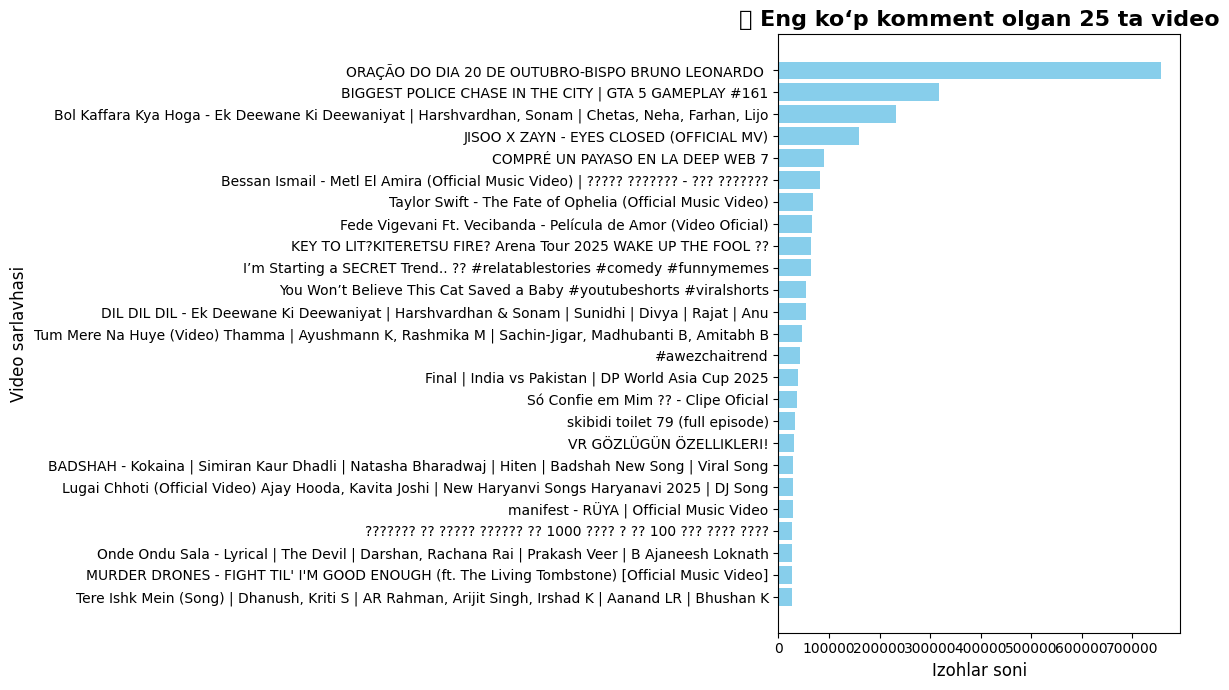

In [17]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üí¨ Eng ko‚Äòp komment olgan 25 ta video
query = """
SELECT TOP 25 
    [Video Title], 
    [Channel], 
    CAST([Comments] AS BIGINT) AS CommentCount
FROM ClusteringData
WHERE ISNUMERIC([Comments]) = 1
ORDER BY CAST([Comments] AS BIGINT) DESC
"""

# üîΩ Ma‚Äôlumotni olish
df_top_comments = pd.read_sql(query, engine)

# üé® Grafik chizish
plt.figure(figsize=(12, 7))
plt.barh(df_top_comments['Video Title'][:25], df_top_comments['CommentCount'][:25], color='skyblue')
plt.gca().invert_yaxis()  # Eng ko‚Äòp komment olgan videoni tepada chiqarish
plt.title("üí¨ Eng ko‚Äòp komment olgan 25 ta video", fontsize=16, fontweight='bold')
plt.xlabel("Izohlar soni", fontsize=12)
plt.ylabel("Video sarlavhasi", fontsize=12)
plt.tight_layout()

plt.show()


# 2025-yil Sentabr oyi bo‚Äòyicha YouTube tahlili

In [20]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üóì 2025-yil sentabr oyi bo‚Äòyicha ko‚Äòrishlar
query = """
SELECT 
    TRY_CAST([Published Date] AS DATE) AS PublishDate,
    [Video Title],
    [Channel],
    CAST([Views] AS BIGINT) AS Views
FROM ClusteringData
WHERE 
    TRY_CAST([Published Date] AS DATE) BETWEEN '2025-09-01' AND '2025-09-30'
    AND ISNUMERIC([Views]) = 1
"""

df_september = pd.read_sql(query, engine)

# üîç Ma'lumotni tekshirish
if df_september.empty:
    print("‚ùå 2025-yil sentabr oyi uchun video ma'lumot topilmadi.")
else:
    print(f"‚úÖ {len(df_september)} ta video ma'lumot topildi.")
    
    # üìà Har bir kun uchun jami ko‚Äòrishlar
    daily_views = df_september.groupby('PublishDate', as_index=False)['Views'].sum()

    # --- üìä Grafik 1: Kunlik ko‚Äòrishlar dinamikasi ---
    fig1 = px.bar(
        daily_views,
        x='PublishDate',
        y='Views',
        text='Views',
        title='üìÜ 2025-yil Sentabr ‚Äî Kunlik Jami Ko‚Äòrishlar',
    )
    fig1.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Sana',
        yaxis_title='Ko‚Äòrishlar soni',
        xaxis_tickangle=-45,
        title_font_size=20,
        showlegend=False
    )
    fig1.show()

    # --- üîù Eng ko‚Äòp ko‚Äòrilgan 5 ta video ---
    top5_videos = df_september.nlargest(5, 'Views')

    fig2 = px.bar(
        top5_videos,
        x='Video Title',
        y='Views',
        color='Channel',
        text='Views',
        title='üî• 2025-yil Sentabr ‚Äî Eng Ko‚Äòp Ko‚Äòrilgan 5 ta Video',
    )
    fig2.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Video nomi',
        yaxis_title='Ko‚Äòrishlar soni',
        xaxis_tickangle=-45,
        showlegend=True
    )
    fig2.show()


‚úÖ 167 ta video ma'lumot topildi.


# 2025-yil Oktyabr oyi bo‚Äòyicha YouTube tahlili

In [21]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üóì 2025-yil oktyabr oyi bo‚Äòyicha ma‚Äôlumot
query = """
SELECT 
    TRY_CAST([Published Date] AS DATE) AS PublishDate,
    [Video Title],
    [Channel],
    CAST([Views] AS BIGINT) AS Views
FROM ClusteringData
WHERE 
    TRY_CAST([Published Date] AS DATE) BETWEEN '2025-10-01' AND '2025-10-31'
    AND ISNUMERIC([Views]) = 1
"""

df_october = pd.read_sql(query, engine)

# üîç Ma'lumotni tekshirish
if df_october.empty:
    print("‚ùå 2025-yil oktyabr oyi uchun video ma'lumot topilmadi.")
else:
    print(f"‚úÖ {len(df_october)} ta video ma'lumot topildi.")

    # üìÜ Har bir kun uchun jami ko‚Äòrishlar
    daily_views = df_october.groupby('PublishDate', as_index=False)['Views'].sum()

    # --- üìä Grafik 1: Kunlik ko‚Äòrishlar dinamikasi ---
    fig1 = px.bar(
        daily_views,
        x='PublishDate',
        y='Views',
        text='Views',
        title='üìÜ 2025-yil Oktyabr ‚Äî Kunlik Jami Ko‚Äòrishlar',
    )
    fig1.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Sana',
        yaxis_title='Ko‚Äòrishlar soni',
        xaxis_tickangle=-45,
        title_font_size=20,
        showlegend=False
    )
    fig1.show()

    # --- üîù Eng ko‚Äòp ko‚Äòrilgan 5 ta video ---
    top5_videos = df_october.nlargest(5, 'Views')

    fig2 = px.bar(
        top5_videos,
        x='Video Title',
        y='Views',
        color='Channel',
        text='Views',
        title='üî• 2025-yil Oktyabr ‚Äî Eng Ko‚Äòp Ko‚Äòrilgan 5 ta Video',
    )
    fig2.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Video nomi',
        yaxis_title='Ko‚Äòrishlar soni',
        xaxis_tickangle=-45,
        showlegend=True
    )
    fig2.show()


‚úÖ 8326 ta video ma'lumot topildi.


# Trendda bo‚Äòlgan davrlar (views keskin oshgan kunlar)

In [37]:
# === 1) Trend spikes (keskin ko‚Äòtarilgan kunlar) ===
daily = df.groupby(df['Published Date'].dt.date)['Views'].sum().reset_index()
daily['pct_change'] = daily['Views'].pct_change().fillna(0)
daily['zscore'] = (daily['Views'] - daily['Views'].mean()) / daily['Views'].std(ddof=0)
daily['spike'] = (daily['pct_change'] > 1.0) | (daily['zscore'] > 2)

spikes = daily[daily['spike']]
print(spikes.head())

fig = px.bar(daily, x='Published Date', y='Views', title='Kunlik ko‚Äòrishlar va spike kunlar')
fig.add_trace(go.Scatter(x=spikes['Published Date'], y=spikes['Views'],
                         mode='markers', marker=dict(size=12, color='red', symbol='star'),
                         name='Trend Spikes'))
fig.show()


   Published Date      Views  pct_change    zscore  spike
1      2025-09-15   99278168   33.652828 -0.614604   True
4      2025-09-18   81187996    1.390467 -0.630556   True
9      2025-09-23  127260680    8.670087 -0.589929   True
14     2025-09-28  257105217    1.704295 -0.475433   True
17     2025-10-01  110262216    2.748848 -0.604918   True


# Publishing time tahlili (soat bo‚Äòyicha)

In [24]:
# === 2) Publishing time ‚Äî ertalab, kechqurun tahlili ===
df['Hour'] = df['Published Date'].dt.hour
hourly = df.groupby('Hour')['Views'].mean().reset_index()

fig = px.bar(hourly, x='Hour', y='Views',
             title='Soat bo‚Äòyicha o‚Äòrtacha ko‚Äòrishlar',
             labels={'Hour':'Soat', 'Views':'O‚Äòrtacha ko‚Äòrishlar'})
fig.update_layout(xaxis=dict(dtick=1))
fig.show()


# Eng ko‚Äòp Views, Likes, Comments olgan CategoryNamelar

In [25]:
# === 3) Eng mashhur kategoriyalar ===
cat = df.groupby('CategoryName')[['Views','Likes','Comments']].sum().reset_index()
top_cat = cat.sort_values('Views', ascending=False).head(10)

fig = px.bar(top_cat, x='CategoryName', y='Views',
             title='Eng ko‚Äòp Views olgan 10 ta kategoriya',
             text='Views')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


# Har bir kategoriya ichida o‚Äòrtacha Views per video

In [26]:
# === 4) Kategoriya ichida o‚Äòrtacha Views per video ===
cat_avg = df.groupby('CategoryName').agg(
    AvgViews=('Views','mean'),
    Count=('Video Title','count')
).reset_index().sort_values('AvgViews', ascending=False)

fig = px.bar(cat_avg.head(10), x='CategoryName', y='AvgViews',
             title='Kategoriya bo‚Äòyicha o‚Äòrtacha Views per video')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


# Har bir davlat bo‚Äòyicha Views va Likes

In [27]:
# === 5) Davlatlar bo‚Äòyicha Views va Likes ===
country = df.groupby('Country')[['Views','Likes']].sum().reset_index()
country_top = country.sort_values('Views', ascending=False).head(10)

fig = px.bar(country_top, x='Country', y=['Views','Likes'],
             barmode='group', title='Davlatlar bo‚Äòyicha jami Views va Likes')
fig.show()


# Eng faol tomoshabinlar mamlakati

In [28]:
# === 6) Eng faol tomoshabinlar mamlakati ===
df['Engagement'] = (df['Likes'] + df['Comments']) / df['Views'].replace(0, np.nan)
country_eng = df.groupby('Country')['Engagement'].mean().reset_index().dropna()
top_eng = country_eng.sort_values('Engagement', ascending=False).head(10)

fig = px.bar(top_eng, x='Country', y='Engagement',
             title='Eng faol tomoshabinlar mamlakati (Engagement rate)')
fig.show()


# Mintaqalar kesimida trend farqlari

In [29]:
# === 7) Region bo‚Äòyicha trend farqlari ===
region_daily = df.groupby([df['Published Date'].dt.date, 'Region'])['Views'].sum().reset_index()
fig = px.line(region_daily, x='Published Date', y='Views', color='Region',
              title='Mintaqalar bo‚Äòyicha kunlik Views trendi')
fig.show()


# Har bir kanal uchun o‚Äòrtacha Views, Likes, Comments

In [30]:
# === 8) Har bir kanal uchun umumiy tahlil ===
channel = df.groupby('Channel').agg(
    AvgViews=('Views','mean'),
    AvgLikes=('Likes','mean'),
    AvgComments=('Comments','mean'),
    VideoCount=('Video Title','count')
).reset_index().sort_values('AvgViews', ascending=False)

print(channel.head(10))

fig = px.bar(channel.head(10), x='Channel', y='AvgViews',
             title='Eng ko‚Äòp o‚Äòrtacha Views olgan kanallar')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


                             Channel     AvgViews   AvgLikes  AvgComments  \
4823                   Pouya Hashemi  161655701.0   893589.0      10608.0   
4764                           Pimgo  135167139.0   619292.0        295.0   
2478                 Frankie Lapenna  128092676.0   451906.0       2133.0   
6613                    el kaiser YT  121675402.0  1207600.0       3538.0   
6124                  Un Par de Ales  114047421.0   401616.0        160.0   
3167  Joint Reduction Simulation Lab  108524849.0   915292.0       2615.0   
6698                        itsanzar  108159256.5   862054.0      10860.5   
1528                    Cat Troubles  106111153.0  1059196.0      10804.0   
3668                  LosWagners ESP   96077127.0   477809.0        288.0   
3871                      Mai Mohini   93011208.0  1716617.0       1806.0   

      VideoCount  
4823           1  
4764           1  
2478           1  
6613           1  
6124           1  
3167           1  
6698           2  


# Har bir kanalning eng mashhur videosi

In [31]:
# === 9) Eng mashhur video (har kanal bo‚Äòyicha) ===
idx = df.groupby('Channel')['Views'].idxmax().dropna()
top_videos = df.loc[idx, ['Channel','Video Title','Views']].sort_values('Views', ascending=False)

fig = px.bar(top_videos.head(10), x='Channel', y='Views',
             hover_data=['Video Title'],
             title='Har bir kanalning eng mashhur videolari')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


# Har oy uchun jami ko‚Äòrishlar, layklar, kommentlar va oylik o‚Äòsish foizi

In [32]:
# === 10) Oylik tahlil ===
monthly = df.groupby(df['Published Date'].dt.to_period('M')).agg(
    TotalViews=('Views','sum'),
    TotalLikes=('Likes','sum'),
    TotalComments=('Comments','sum')
).reset_index()
monthly['Month'] = monthly['Published Date'].dt.to_timestamp()
monthly['Growth%'] = monthly['TotalViews'].pct_change().fillna(0)*100

fig = px.line(monthly, x='Month', y='TotalViews',
              title='Oylik jami ko‚Äòrishlar va o‚Äòsish foizi')
fig.add_trace(go.Scatter(x=monthly['Month'], y=monthly['Growth%'],
                         mode='lines+markers', name='O‚Äòsish (%)', yaxis='y2'))
fig.update_layout(
    yaxis2=dict(overlaying='y', side='right', title='O‚Äòsish (%)')
)
fig.show()


C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_15556\2541383624.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



# ‚ÄúAnomaly‚Äù ustuni 1 bo‚Äòlgan videolar (tahlil)

In [33]:
# === 11) Anomaly videolar tahlili ===
anom = df[df['Anomaly'] == 1]

if not anom.empty:
    print("Anomal videolar soni:", len(anom))
    print("O‚Äòrtacha Views:", anom['Views'].mean())
    print("O‚Äòrtacha Likes:", anom['Likes'].mean())
    print("O‚Äòrtacha Comments:", anom['Comments'].mean())

    fig = px.scatter(df, x='Views', y='Likes', color=df['Anomaly'].astype(str),
                     title='Anomaly vs Normal (Views vs Likes)',
                     hover_data=['Video Title'])
    fig.update_xaxes(type='log')
    fig.show()
else:
    print("‚ùå Anomaly = 1 yozuvlar topilmadi.")


‚ùå Anomaly = 1 yozuvlar topilmadi.


# Trendda bo‚Äòlgan davrlar (Views keskin oshgan kunlar)

In [38]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üìä SQL: kunlik jami Views va oldingi kunga nisbatan o‚Äòsish
query = """
WITH DailyViews AS (
    SELECT 
        TRY_CAST([Published Date] AS DATE) AS ViewDate,
        SUM(CAST(Views AS BIGINT)) AS TotalViews
    FROM ClusteringData
    WHERE ISNUMERIC(Views) = 1
    GROUP BY TRY_CAST([Published Date] AS DATE)
)
SELECT 
    ViewDate,
    TotalViews,
    LAG(TotalViews) OVER (ORDER BY ViewDate) AS PrevViews,
    (TotalViews - LAG(TotalViews) OVER (ORDER BY ViewDate)) AS Diff,
    CASE 
        WHEN LAG(TotalViews) OVER (ORDER BY ViewDate) > 0 THEN 
            (TotalViews - LAG(TotalViews) OVER (ORDER BY ViewDate)) * 100.0 /
            LAG(TotalViews) OVER (ORDER BY ViewDate)
        ELSE NULL
    END AS GrowthPercent
FROM DailyViews
ORDER BY ViewDate;
"""

df_trend = pd.read_sql(query, engine)

if df_trend.empty:
    print("‚ùå Ma'lumot topilmadi.")
else:
    print(f"‚úÖ {len(df_trend)} kunlik ma'lumot topildi.")

    # --- üìà Grafik 1: Kunlik jami ko‚Äòrishlar ---
    fig1 = px.line(
        df_trend,
        x='ViewDate',
        y='TotalViews',
        markers=True,
        title='üìÜ Kunlik jami ko‚Äòrishlar (Trend kuzatuvi)',
    )
    fig1.update_layout(xaxis_title='Sana', yaxis_title='Ko‚Äòrishlar soni')
    fig1.show()

    # --- üìä Grafik 2: O‚Äòsish foizi (keskin o‚Äòsishlarni ajratib ko‚Äòrsatish) ---
    df_trend['IsSpike'] = df_trend['GrowthPercent'] > 50  # 50% dan ortiq o‚Äòsish
    fig2 = px.bar(
        df_trend,
        x='ViewDate',
        y='GrowthPercent',
        color='IsSpike',
        color_discrete_map={True: 'crimson', False: 'lightblue'},
        title='üìä Kunlik o‚Äòsish foizi (Trenddagi kunlar qizil bilan)',
    )
    fig2.update_layout(xaxis_title='Sana', yaxis_title='O‚Äòsish (%)')
    fig2.show()


‚úÖ 37 kunlik ma'lumot topildi.


# ‚ÄúPublishing time‚Äù (Ertalab vs Kechqurun tahlili)

In [39]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üß© SQL: Video joylangan soatni ajratamiz va vaqt oralig‚Äòiga bo‚Äòlamiz
query = """
WITH PublishHour AS (
    SELECT
        [Video Title],
        [Channel],
        DATEPART(HOUR, TRY_CAST([Published Date] AS DATETIME)) AS Hour,
        CAST(Views AS BIGINT) AS Views
    FROM ClusteringData
    WHERE ISNUMERIC(Views) = 1
)
SELECT
    CASE 
        WHEN Hour BETWEEN 5 AND 11 THEN 'Ertalab (05:00‚Äì11:59)'
        WHEN Hour BETWEEN 12 AND 17 THEN 'Tush (12:00‚Äì17:59)'
        WHEN Hour BETWEEN 18 AND 22 THEN 'Kechqurun (18:00‚Äì22:59)'
        ELSE 'Tun (23:00‚Äì04:59)'
    END AS TimePeriod,
    COUNT(*) AS VideoCount,
    AVG(Views) AS AvgViews,
    SUM(Views) AS TotalViews
FROM PublishHour
GROUP BY 
    CASE 
        WHEN Hour BETWEEN 5 AND 11 THEN 'Ertalab (05:00‚Äì11:59)'
        WHEN Hour BETWEEN 12 AND 17 THEN 'Tush (12:00‚Äì17:59)'
        WHEN Hour BETWEEN 18 AND 22 THEN 'Kechqurun (18:00‚Äì22:59)'
        ELSE 'Tun (23:00‚Äì04:59)'
    END
ORDER BY TotalViews DESC;
"""

df_time = pd.read_sql(query, engine)

if df_time.empty:
    print("‚ùå Ma'lumot topilmadi.")
else:
    print("‚úÖ Publishing time tahlil ma‚Äôlumotlari tayyor.")
    display(df_time)

    # --- üìä Grafik 1: Har bir vaqt oralig‚Äòida nechta video joylangan ---
    fig1 = px.bar(
        df_time,
        x='TimePeriod',
        y='VideoCount',
        text='VideoCount',
        title='üìä Videolar soni ‚Äî Joylangan vaqt oralig‚Äòiga ko‚Äòra',
        color='TimePeriod'
    )
    fig1.update_traces(textposition='outside')
    fig1.update_layout(
        xaxis_title='Vaqt oralig‚Äòi',
        yaxis_title='Videolar soni',
        showlegend=False
    )
    fig1.show()

    # --- üìà Grafik 2: O‚Äòrtacha ko‚Äòrishlar (Views) vaqt oralig‚Äòiga ko‚Äòra ---
    fig2 = px.bar(
        df_time,
        x='TimePeriod',
        y='AvgViews',
        text='AvgViews',
        title='üìà O‚Äòrtacha ko‚Äòrishlar ‚Äî Joylangan vaqt oralig‚Äòiga ko‚Äòra',
        color='TimePeriod'
    )
    fig2.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Vaqt oralig‚Äòi',
        yaxis_title='O‚Äòrtacha Views soni',
        showlegend=False
    )
    fig2.show()


‚úÖ Publishing time tahlil ma‚Äôlumotlari tayyor.


TimePeriod  VideoCount  AvgViews   TotalViews
0       Tush (12:00‚Äì17:59)        3174   3164877  10045320857
1    Ertalab (05:00‚Äì11:59)        2641   3651735   9644234601
2        Tun (23:00‚Äì04:59)        1368   4035469   5520521729
3  Kechqurun (18:00‚Äì22:59)        1310   3245804   4252004126

# Eng ko‚Äòp Views, Likes, Comments olgan kategoriyalar

In [40]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üß© SQL so‚Äòrov: Har bir kategoriya bo‚Äòyicha Views, Likes, Comments yig‚Äòindisini hisoblaymiz
query = """
SELECT 
    [CategoryName],
    SUM(CAST(Views AS BIGINT)) AS TotalViews,
    SUM(CAST(Likes AS BIGINT)) AS TotalLikes,
    SUM(CAST(Comments AS BIGINT)) AS TotalComments
FROM ClusteringData
WHERE 
    ISNUMERIC(Views) = 1 AND 
    ISNUMERIC(Likes) = 1 AND 
    ISNUMERIC(Comments) = 1
GROUP BY [CategoryName]
ORDER BY TotalViews DESC;
"""

df_cat = pd.read_sql(query, engine)

if df_cat.empty:
    print("‚ùå Ma'lumot topilmadi.")
else:
    print("‚úÖ Kategoriya bo‚Äòyicha Views, Likes, Comments tahlili tayyor.")
    display(df_cat.head())

    # --- üìä Grafik 1: Eng ko‚Äòp ko‚Äòrilgan kategoriyalar ---
    fig1 = px.bar(
        df_cat.head(10),
        x='CategoryName',
        y='TotalViews',
        text='TotalViews',
        title='üî• Eng Ko‚Äòp Ko‚Äòrilgan 10 ta Kategoriya',
        color='CategoryName'
    )
    fig1.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Kategoriya nomi',
        yaxis_title='Jami ko‚Äòrishlar (Views)',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig1.show()

    # --- üíñ Grafik 2: Eng ko‚Äòp Like olgan kategoriyalar ---
    fig2 = px.bar(
        df_cat.sort_values('TotalLikes', ascending=False).head(10),
        x='CategoryName',
        y='TotalLikes',
        text='TotalLikes',
        title='üíñ Eng Ko‚Äòp Like Olgan 10 ta Kategoriya',
        color='CategoryName'
    )
    fig2.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Kategoriya nomi',
        yaxis_title='Jami layklar (Likes)',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig2.show()

    # --- üí¨ Grafik 3: Eng ko‚Äòp Komment olgan kategoriyalar ---
    fig3 = px.bar(
        df_cat.sort_values('TotalComments', ascending=False).head(10),
        x='CategoryName',
        y='TotalComments',
        text='TotalComments',
        title='üí¨ Eng Ko‚Äòp Izoh Olgan 10 ta Kategoriya',
        color='CategoryName'
    )
    fig3.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig3.update_layout(
        xaxis_title='Kategoriya nomi',
        yaxis_title='Jami izohlar (Comments)',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig3.show()


‚úÖ Kategoriya bo‚Äòyicha Views, Likes, Comments tahlili tayyor.


CategoryName  TotalViews  TotalLikes  TotalComments
0     Howto & Style  6771214617    92124125        1330215
1  Film & Animation  5451074014    90157465         505576
2     Entertainment  4945823910    63159904         712908
3            Sports  2738507218    42028587         451417
4  Autos & Vehicles  2577726411    34024575         373598

# Har bir kategoriya ichida o‚Äòrtacha Views per video

In [41]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üß© SQL so‚Äòrov: har bir CategoryName uchun o‚Äòrtacha Views hisoblash
query = """
SELECT 
    [CategoryName],
    COUNT([Video ID]) AS VideoCount,
    AVG(CAST(Views AS BIGINT)) AS AvgViews,
    SUM(CAST(Views AS BIGINT)) AS TotalViews
FROM ClusteringData
WHERE ISNUMERIC(Views) = 1
GROUP BY [CategoryName]
ORDER BY AvgViews DESC;
"""

df_avg = pd.read_sql(query, engine)

if df_avg.empty:
    print("‚ùå Ma'lumot topilmadi.")
else:
    print("‚úÖ Har bir kategoriya uchun o‚Äòrtacha Views tahlili tayyor.")
    display(df_avg.head(10))

    # --- üìä Grafik: Kategoriyalar bo‚Äòyicha o‚Äòrtacha Views ---
    fig = px.bar(
        df_avg.head(10),
        x='CategoryName',
        y='AvgViews',
        text='AvgViews',
        color='CategoryName',
        title='üì∫ Har bir Kategoriya uchun O‚Äòrtacha Ko‚Äòrishlar (Views per Video)'
    )

    fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig.update_layout(
        xaxis_title='Kategoriya nomi',
        yaxis_title='O‚Äòrtacha ko‚Äòrishlar soni',
        xaxis_tickangle=-45,
        showlegend=False
    )

    fig.show()


‚úÖ Har bir kategoriya uchun o‚Äòrtacha Views tahlili tayyor.


CategoryName  VideoCount  AvgViews  TotalViews
0         Entertainment         534   9261842  4945823910
1         Howto & Style         872   7765154  6771214617
2      Film & Animation         946   5762234  5451074014
3                Comedy         543   4598731  2497111059
4      Autos & Vehicles         685   3763104  2577726411
5                Sports         826   3315384  2738507218
6  Science & Technology         603   2497268  1505852633
7                 Music         756   2431930  1838539671
8       News & Politics        1299    521237   677087247
9                Gaming        1120    339901   380689457

# Har bir davlat bo‚Äòyicha Views va Likes

In [42]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üåç SQL so‚Äòrov: Har bir davlat bo‚Äòyicha jami va o‚Äòrtacha Views/Likes
query = """
SELECT 
    [Country],
    COUNT([Video ID]) AS VideoCount,
    SUM(CAST(Views AS BIGINT)) AS TotalViews,
    SUM(CAST(Likes AS BIGINT)) AS TotalLikes,
    AVG(CAST(Views AS BIGINT)) AS AvgViews,
    AVG(CAST(Likes AS BIGINT)) AS AvgLikes
FROM ClusteringData
WHERE ISNUMERIC(Views) = 1 AND ISNUMERIC(Likes) = 1
GROUP BY [Country]
ORDER BY TotalViews DESC;
"""

df_country = pd.read_sql(query, engine)

if df_country.empty:
    print("‚ùå Ma'lumot topilmadi.")
else:
    print("‚úÖ Har bir davlat bo‚Äòyicha Views & Likes tahlili tayyor.")
    display(df_country.head(10))

    # --- üìä Grafik 1: Davlatlar bo‚Äòyicha jami Views ---
    fig1 = px.bar(
        df_country.head(10),
        x='Country',
        y='TotalViews',
        text='TotalViews',
        color='Country',
        title='üåç Eng Ko‚Äòp Ko‚Äòrilgan Davlatlar (Jami Views)',
    )
    fig1.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Davlat',
        yaxis_title='Jami ko‚Äòrishlar soni',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig1.show()

    # --- üìä Grafik 2: Davlatlar bo‚Äòyicha o‚Äòrtacha Likes ---
    fig2 = px.bar(
        df_country.head(10),
        x='Country',
        y='AvgLikes',
        text='AvgLikes',
        color='Country',
        title='üëç Davlatlar bo‚Äòyicha O‚Äòrtacha Layklar',
    )
    fig2.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Davlat',
        yaxis_title='O‚Äòrtacha layklar soni',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig2.show()


‚úÖ Har bir davlat bo‚Äòyicha Views & Likes tahlili tayyor.


Country  VideoCount  TotalViews  TotalLikes  AvgViews  AvgLikes
0  Noma‚Äôlum        1649  7193851946   109797604   4362554     66584
1        IN         552  5281954236    57561631   9568757    104278
2        US         844  5255581553    88089346   6226992    104371
3        ID         224  1030075560    11655741   4598551     52034
4        BR         292   998029481    17805270   3417909     60976
5        JP         262   815934502    12641806   3114253     48251
6        KR         275   805866097    10844703   2930422     39435
7        TR         260   675777992     7772912   2599146     29895
8        VN         230   560446589     4911467   2436724     21354
9        GB         167   487445529     8258617   2918835     49452

# Eng faol tomoshabinlar mamlakati

In [43]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üëÄ SQL so‚Äòrov: Eng faol tomoshabinlar mamlakati
query = """
SELECT 
    [Country],
    SUM(CAST(Views AS BIGINT)) AS TotalViews,
    SUM(CAST(Likes AS BIGINT)) AS TotalLikes,
    SUM(CAST(Comments AS BIGINT)) AS TotalComments
FROM ClusteringData
WHERE ISNUMERIC(Views) = 1 AND ISNUMERIC(Likes) = 1 AND ISNUMERIC(Comments) = 1
GROUP BY [Country]
ORDER BY TotalViews DESC;
"""

df_active_countries = pd.read_sql(query, engine)

if df_active_countries.empty:
    print("‚ùå Ma'lumot topilmadi.")
else:
    print("‚úÖ Eng faol tomoshabinlar mamlakati tahlili tayyor.")
    display(df_active_countries.head(10))

    # --- üìä Grafik: Eng faol 10 ta mamlakat (Views bo‚Äòyicha) ---
    fig = px.bar(
        df_active_countries.head(10),
        x='Country',
        y='TotalViews',
        text='TotalViews',
        color='Country',
        title='üåç Eng Faol Tomoshabinlar Mamlakati (Jami Views bo‚Äòyicha)',
    )
    fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig.update_layout(
        xaxis_title='Davlat',
        yaxis_title='Jami ko‚Äòrishlar soni',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig.show()

    # --- üìä Grafik 2: Likes va Comments taqqoslanishi ---
    fig2 = px.scatter(
        df_active_countries.head(15),
        x='TotalLikes',
        y='TotalComments',
        size='TotalViews',
        color='Country',
        title='üí¨ Likes va Comments o‚Äòrtasidagi bog‚Äòliqlik (Davlatlar kesimida)',
        hover_name='Country',
        size_max=60
    )
    fig2.update_layout(
        xaxis_title='Layklar soni',
        yaxis_title='Kommentlar soni'
    )
    fig2.show()
    


‚úÖ Eng faol tomoshabinlar mamlakati tahlili tayyor.


Country  TotalViews  TotalLikes  TotalComments
0  Noma‚Äôlum  7193851946   109797604        1290780
1        IN  5281954236    57561631        1286096
2        US  5255581553    88089346        1187141
3        ID  1030075560    11655741         136204
4        BR   998029481    17805270         953633
5        JP   815934502    12641806         297875
6        KR   805866097    10844703         404982
7        TR   675777992     7772912         230668
8        VN   560446589     4911467         150268
9        GB   487445529     8258617         213025

# Mintaqalar kesimida trend farqlari

In [44]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üåç SQL so‚Äòrov: Mintaqalar bo‚Äòyicha Views, Likes, Comments
query = """
SELECT 
    [Region],
    SUM(CAST(Views AS BIGINT)) AS TotalViews,
    SUM(CAST(Likes AS BIGINT)) AS TotalLikes,
    SUM(CAST(Comments AS BIGINT)) AS TotalComments,
    COUNT(*) AS VideoCount
FROM ClusteringData
WHERE ISNUMERIC(Views) = 1 AND ISNUMERIC(Likes) = 1 AND ISNUMERIC(Comments) = 1
GROUP BY [Region]
ORDER BY TotalViews DESC;
"""

df_region_trends = pd.read_sql(query, engine)

if df_region_trends.empty:
    print("‚ùå Ma'lumot topilmadi.")
else:
    print("‚úÖ Mintaqalar kesimida trend tahlili tayyor.")
    display(df_region_trends)

    # --- üìä Grafik 1: Mintaqalar bo‚Äòyicha jami Views ---
    fig1 = px.bar(
        df_region_trends,
        x='Region',
        y='TotalViews',
        text='TotalViews',
        color='Region',
        title='üåé Mintaqalar bo‚Äòyicha jami ko‚Äòrishlar soni',
    )
    fig1.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Mintaqa',
        yaxis_title='Jami ko‚Äòrishlar',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig1.show()

    # --- üìä Grafik 2: Likes va Comments o‚Äòrtacha qiymatlari ---
    df_region_trends['AvgLikes'] = df_region_trends['TotalLikes'] / df_region_trends['VideoCount']
    df_region_trends['AvgComments'] = df_region_trends['TotalComments'] / df_region_trends['VideoCount']

    fig2 = px.scatter(
        df_region_trends,
        x='AvgLikes',
        y='AvgComments',
        size='TotalViews',
        color='Region',
        hover_name='Region',
        title='üí¨ Mintaqalar kesimida Likes va Comments o‚Äòrtacha taqqoslanishi',
        size_max=60
    )
    fig2.update_layout(
        xaxis_title='O‚Äòrtacha Likes',
        yaxis_title='O‚Äòrtacha Comments'
    )
    fig2.show()


‚úÖ Mintaqalar kesimida trend tahlili tayyor.


Region  TotalViews  TotalLikes  TotalComments  VideoCount
0      AU  3502355226    77426353        1164426         344
1      PK  2647089501    21241909         207890         236
2      EG  1846083044    17836464         137834         295
3      BD  1724325127    16754184         729594         264
4      PE  1659999719    33652665         393828         269
5      MY  1596939353    17592186         211143         212
6      IN  1432125946    22924197         318008         255
7      PL  1091560924    13200408         259184         291
8      BR   991432607    19215360         948696         289
9      RU   857731316    12203919         283423         283
10     ID   788764182     6615579         119000         191
11     JP   738235113    11463860         280741         307
12     KE   712476432     8367267         120947         146
13     NG   647579095    11963940         239276         185
14     VN   593123135     5264573         155062         287
15     KR   591581607     7057640         190187         287
16     SA   587013076     7078276         109492         138
17     SG   554013516    10285451         137912          97
18     NZ   537145624    10818300         263136          93
19     TR   513789601     5582823         210178         289
20     PH   486637746     5522820          79668         132
21     TH   480968307     7211224         153129         277
22     MA   470500359     5769934          91969         194
23     TW   371964005     5016222         138413         277
24     RO   364230941     4092595          67192         207
25     HU   342018765     7423766          48066         139
26     DE   304761134     5681276         116275         202
27     AR   301541715     6411665          77953         142
28     HK   247031337     2836715          97261         106
29     US   219720822     5619810         142979          89
30     CA   208529702     5803328         106666          86
31     CH   180189291     4026130          83092          68
32     ES   169978627     3563170          53556         125
33     GR   157256150     1457558          34037         148
34     UA   147981996     2195744          55400         124
35     IT   139780287     2940596          58495         215
36     IL   137281841     1308630          38714         115
37     MX   134797074     3067349          62710          91
38     FR   122339734     3415677          61617         164
39     PT   108971897     2674599          69276          84
40     CO    99824577     1599804          30522          64
41     CL    98248890     3135817          50762          75
42     NO    97386322     2100237         140230          33
43     ZA    94650748     2047863          39822          88
44     SE    88640435     1843929          51417          59
45     BE    84900253     2305954          71076         112
46     CZ    69282383     1270456          21811         161
47     GB    60617888     1451122          45842          65
48     NL    29725609      747142          24482          44
49     AT    28958334      435006          20117          49

# Har bir kanal bo‚Äòyicha tahlil

In [45]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üß† SQL so‚Äòrov: har bir kanal uchun statistikalar
query = """
SELECT 
    [Channel],
    COUNT(*) AS VideoCount,
    AVG(CAST(Views AS BIGINT)) AS AvgViews,
    AVG(CAST(Likes AS BIGINT)) AS AvgLikes,
    AVG(CAST(Comments AS BIGINT)) AS AvgComments,
    MAX(CAST(Views AS BIGINT)) AS MaxViews
FROM ClusteringData
WHERE ISNUMERIC(Views) = 1 AND ISNUMERIC(Likes) = 1 AND ISNUMERIC(Comments) = 1
GROUP BY [Channel]
ORDER BY AvgViews DESC;
"""

df_channel_stats = pd.read_sql(query, engine)

if df_channel_stats.empty:
    print("‚ùå Kanal bo‚Äòyicha ma'lumot topilmadi.")
else:
    print("‚úÖ Kanal bo‚Äòyicha tahlil tayyor.")
    display(df_channel_stats.head(10))

    # --- üìä Grafik 1: Eng ko‚Äòp o‚Äòrtacha Views olgan 10 ta kanal ---
    top10_channels = df_channel_stats.nlargest(10, 'AvgViews')

    fig1 = px.bar(
        top10_channels,
        x='Channel',
        y='AvgViews',
        text='AvgViews',
        color='Channel',
        title='üì∫ Eng ko‚Äòp o‚Äòrtacha Views olgan 10 ta kanal',
    )
    fig1.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Kanal nomi',
        yaxis_title='O‚Äòrtacha Views',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig1.show()

# --- üîù Har bir kanalning eng mashhur videosini topish ---
query_top_videos = """
SELECT 
    c1.[Channel],
    c1.[Video Title],
    CAST(c1.[Views] AS BIGINT) AS Views
FROM ClusteringData c1
WHERE ISNUMERIC(c1.[Views]) = 1
AND CAST(c1.[Views] AS BIGINT) = (
    SELECT MAX(CAST(c2.[Views] AS BIGINT))
    FROM ClusteringData c2
    WHERE c2.[Channel] = c1.[Channel]
)
ORDER BY Views DESC;
"""

df_top_videos = pd.read_sql(query_top_videos, engine)

if df_top_videos.empty:
    print("‚ùå Eng mashhur videolar topilmadi.")
else:
    print("üé¨ Har bir kanalning eng mashhur videolari:")
    display(df_top_videos.head(10))

    # --- üìä Grafik 2: Har bir kanalning eng mashhur videolari (Views bo‚Äòyicha) ---
    fig2 = px.bar(
        df_top_videos.nlargest(10, 'Views'),
        x='Channel',
        y='Views',
        color='Channel',
        text='Views',
        title='üî• Har bir kanalning eng mashhur (ko‚Äòp ko‚Äòrilgan) 10 ta videosi'
    )
    fig2.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Kanal nomi',
        yaxis_title='Ko‚Äòrishlar soni',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig2.show()


‚úÖ Kanal bo‚Äòyicha tahlil tayyor.


Channel  VideoCount   AvgViews  AvgLikes  \
0                   Pouya Hashemi           1  161655701    893589   
1                           Pimgo           1  135167139    619292   
2                 Frankie Lapenna           1  128092676    451906   
3                    el kaiser YT           1  121675402   1207600   
4                  Un Par de Ales           1  114047421    401616   
5  Joint Reduction Simulation Lab           1  108524849    915292   
6                        itsanzar           2  108159256    862054   
7                    Cat Troubles           1  106111153   1059196   
8                  LosWagners ESP           1   96077127    477809   
9                      Mai Mohini           1   93011208   1716617   

   AvgComments   MaxViews  
0        10608  161655701  
1          295  135167139  
2         2133  128092676  
3         3538  121675402  
4          160  114047421  
5         2615  108524849  
6        10860  137295275  
7        10804  106111153  
8          288   96077127  
9         1806   93011208

üé¨ Har bir kanalning eng mashhur videolari:


Channel  \
0                   Pouya Hashemi   
1                     John Nellis   
2                        itsanzar   
3                           Pimgo   
4                    ISSEI / ????   
5                 Frankie Lapenna   
6                    el kaiser YT   
7                  Un Par de Ales   
8  Joint Reduction Simulation Lab   
9                    Cat Troubles   

                                         Video Title      Views  
0  Gainesville, FL doorbell camera captured the m...  161655701  
1                    Find My Football, Win ¬£1,000 ??  138739251  
2                                hero dog seved baby  137295275  
3                      PIMGO VIROU MINHOCA E ENTROU!  135167139  
4          ?National Food?How to love Natto????@Tade  134137949  
5                 Corvette VS. people tied to chairs  128092676  
6                       desatorar f√°cil con esto ???  121675402  
7                      Ballerina-Cappuccina Vol 2 ??  114047421  
8  ‚ÄúWould You Let a Rookie Reduce YOUR Shoulder?‚Äù...  108524849  
9  Pitbull vs Bear to protect the owner #dogshort...  106111153

# Oylik o‚Äòsish tahlili

In [46]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üß† SQL so‚Äòrov: Har oy uchun jami Views, Likes, Comments
query = """
SELECT 
    YEAR(TRY_CAST([Published Date] AS DATE)) AS Year,
    MONTH(TRY_CAST([Published Date] AS DATE)) AS Month,
    SUM(CAST([Views] AS BIGINT)) AS TotalViews,
    SUM(CAST([Likes] AS BIGINT)) AS TotalLikes,
    SUM(CAST([Comments] AS BIGINT)) AS TotalComments
FROM ClusteringData
WHERE ISNUMERIC([Views]) = 1 AND ISNUMERIC([Likes]) = 1 AND ISNUMERIC([Comments]) = 1
GROUP BY YEAR(TRY_CAST([Published Date] AS DATE)), MONTH(TRY_CAST([Published Date] AS DATE))
ORDER BY Year, Month;
"""

df_monthly = pd.read_sql(query, engine)

if df_monthly.empty:
    print("‚ùå Oylik ma'lumotlar topilmadi.")
else:
    print("‚úÖ Oylik jami statistikalar tayyor.")
    display(df_monthly)

    # üìÜ Oylik sana ustuni
    df_monthly['MonthName'] = df_monthly['Year'].astype(str) + "-" + df_monthly['Month'].astype(str).str.zfill(2)

    # üìà O‚Äòsish foizlarini hisoblash
    df_monthly['ViewsGrowth_%'] = df_monthly['TotalViews'].pct_change() * 100
    df_monthly['LikesGrowth_%'] = df_monthly['TotalLikes'].pct_change() * 100
    df_monthly['CommentsGrowth_%'] = df_monthly['TotalComments'].pct_change() * 100

    # --- üìä Grafik 1: Har oy uchun jami ko‚Äòrishlar ---
    fig1 = px.line(
        df_monthly,
        x='MonthName',
        y='TotalViews',
        markers=True,
        title='üìà Oylik jami ko‚Äòrishlar dinamikasi'
    )
    fig1.update_layout(
        xaxis_title='Oy',
        yaxis_title='Jami ko‚Äòrishlar soni',
        xaxis_tickangle=-45
    )
    fig1.show()

    # --- üìä Grafik 2: Har oy bo‚Äòyicha o‚Äòsish foizi ---
    fig2 = px.bar(
        df_monthly,
        x='MonthName',
        y='ViewsGrowth_%',
        text='ViewsGrowth_%',
        title='üìä Oylik ko‚Äòrishlar o‚Äòsish foizi (%)'
    )
    fig2.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig2.update_layout(
        xaxis_title='Oy',
        yaxis_title='O‚Äòsish foizi (%)',
        xaxis_tickangle=-45
    )
    fig2.show()

    # --- üìä Grafik 3: Likes va Comments uchun ---
    fig3 = px.line(
        df_monthly,
        x='MonthName',
        y=['TotalLikes', 'TotalComments'],
        markers=True,
        title='üí¨ Oylik Likes va Comments dinamikasi'
    )
    fig3.update_layout(
        xaxis_title='Oy',
        yaxis_title='Jami soni',
        xaxis_tickangle=-45
    )
    fig3.show()


‚úÖ Oylik jami statistikalar tayyor.


Year  Month   TotalViews  TotalLikes  TotalComments
0  2025      9   1348425873    20813669         772450
1  2025     10  28113655440   418707823        7840056

# ‚ÄúAnomaly‚Äù ustuni bo‚Äòyicha tahlil

In [47]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# üîó SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# üß† SQL so‚Äòrov: Anomaly ustuni bo‚Äòyicha o‚Äòrtacha statistikalar
query = """
SELECT 
    [Anomaly],
    AVG(CAST([Views] AS BIGINT)) AS AvgViews,
    AVG(CAST([Likes] AS BIGINT)) AS AvgLikes,
    AVG(CAST([Comments] AS BIGINT)) AS AvgComments,
    COUNT(*) AS VideoCount
FROM ClusteringData
WHERE ISNUMERIC([Views]) = 1 
  AND ISNUMERIC([Likes]) = 1 
  AND ISNUMERIC([Comments]) = 1
GROUP BY [Anomaly];
"""

df_anomaly = pd.read_sql(query, engine)

if df_anomaly.empty:
    print("‚ùå Anomaly ma'lumotlari topilmadi.")
else:
    print("‚úÖ Anomaly = 1 va 0 bo‚Äòlgan videolar tahlili tayyor.")
    display(df_anomaly)

    # üî¢ 'Anomaly' qiymatini matnga aylantiramiz
    df_anomaly['Anomaly'] = df_anomaly['Anomaly'].map({0: 'Normal', 1: 'Anomaly'})

    # --- üìä Grafik 1: Views taqqoslanishi ---
    fig1 = px.bar(
        df_anomaly,
        x='Anomaly',
        y='AvgViews',
        text='AvgViews',
        title='üëÅÔ∏è O‚Äòrtacha Views taqqoslanishi (Normal vs Anomaly)',
        color='Anomaly'
    )
    fig1.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig1.update_layout(yaxis_title='O‚Äòrtacha Views', xaxis_title='Turi', showlegend=False)
    fig1.show()

    # --- üìä Grafik 2: Likes taqqoslanishi ---
    fig2 = px.bar(
        df_anomaly,
        x='Anomaly',
        y='AvgLikes',
        text='AvgLikes',
        title='üëç O‚Äòrtacha Likes taqqoslanishi',
        color='Anomaly'
    )
    fig2.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig2.update_layout(yaxis_title='O‚Äòrtacha Likes', xaxis_title='Turi', showlegend=False)
    fig2.show()

    # --- üìä Grafik 3: Comments taqqoslanishi ---
    fig3 = px.bar(
        df_anomaly,
        x='Anomaly',
        y='AvgComments',
        text='AvgComments',
        title='üí¨ O‚Äòrtacha Comments taqqoslanishi',
        color='Anomaly'
    )
    fig3.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig3.update_layout(yaxis_title='O‚Äòrtacha Comments', xaxis_title='Turi', showlegend=False)
    fig3.show()

    # --- üìä Grafik 4: Anomaliya va normal videolar soni ---
    fig4 = px.pie(
        df_anomaly,
        names='Anomaly',
        values='VideoCount',
        title='üéØ Normal va Anomaly videolar ulushi'
    )
    fig4.show()


‚úÖ Anomaly = 1 va 0 bo‚Äòlgan videolar tahlili tayyor.


Anomaly  AvgViews  AvgLikes  AvgComments  VideoCount
0   Normal   2623792     37971          622        8323
1  Anomaly  44848565    726403        20181         170